<h1>Historical data</h1>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Write a class to load data
class Data:
    def __init__(self, data):
        self.data = data
    def readData(self):
        df = pd.read_csv(self.data)
        return df

In [3]:
#Load data
D = Data("data/historical_energy_data.csv")
df = D.readData()

In [4]:
#view First five columns
df.head()

,Date/Time,Location/Region,Energy Source,Energy Demand,Energy Consumption (kWh),Energy Price,Operational Costs,Energy Production (kWh)
0,01/01/2012,Region A,Fossil Fuels,24016,21848,0.131630,1564.239198,31604
1,02/01/2012,Region C,Fossil Fuels,56200,34796,0.160969,3837.295411,11734
2,03/01/2012,Region A,Renewables,81268,36244,0.155890,4418.260676,31523
3,04/01/2012,Region C,Fossil Fuels,61287,19955,0.130128,3743.417970,21205
4,05/01/2012,Region B,Fossil Fuels,93447,13788,0.151835,1071.513936,19548


In [5]:
#Get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date/Time                 1000 non-null   object 
 1   Location/Region           1000 non-null   object 
 2   Energy Source             1000 non-null   object 
 3   Energy Demand             1000 non-null   int64  
 4   Energy Consumption (kWh)  1000 non-null   int64  
 5   Energy Price              1000 non-null   float64
 6   Operational Costs         1000 non-null   float64
 7   Energy Production (kWh)   1000 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [6]:
# reconfirming my column
df['Energy Source'].isin(["Fossil Fuels", "Renewables"])[:5]

0    True
1    True
2    True
3    True
4    True
Name: Energy Source, dtype: bool

In [8]:
#statistical overview
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Energy Demand,1000.0,49336.335000,28215.243714,1015.000000,25812.750000,49398.500000,73877.500000,99941.000000
Energy Consumption (kWh),1000.0,24249.533000,14092.904681,505.000000,12017.750000,23178.000000,36563.000000,49985.000000
Energy Price,1000.0,0.126752,0.042857,0.050368,0.091048,0.126799,0.163701,0.199951
Operational Costs,1000.0,3002.452425,1189.898418,1000.630978,1957.452731,2954.748776,4095.759662,4995.000138
Energy Production (kWh),1000.0,25502.488000,14057.976149,850.000000,13235.750000,24946.000000,37653.250000,49936.000000


<h2>Observation</h2>
<ul style="list-style:none">
    <li><b>Energy Demand:  </b>The difference between the max and min value amounted to 94,941 showing strong increase</li>
    <li><b>Energy Consumption (kWh):</b> The inter quartile range of the energy consumption happen to slightly progress the second quantile value rose more than 100%, then to 200% and 300% for the third and fourth quantile range respectively</li>
    <li><b>Energy Price:</b>The mean price for energy has a large margin from the max value. Which might increase high
    chance of more energy consumption</li>
    <li><b>Operational Costs:</b> The cost of operation didn't increase that much.</li>
    <li><b>Energy Production (kWh):</b> 49936 is the highest amount spent on energy production!</li>
</ul>
<p>The have been consistency in value rise in all numerical columns</p>

In [9]:
# An overall analysis on object columns
for col in df.describe(include="object"):
    print(f"The value for {col} is:")
    print(df[col].value_counts())
    print(" ")

The value for Date/Time is:
Date/Time
01/01/2012    1
02/11/2013    1
20/10/2013    1
21/10/2013    1
22/10/2013    1
             ..
04/12/2012    1
05/12/2012    1
06/12/2012    1
07/12/2012    1
26/09/2014    1
Name: count, Length: 1000, dtype: int64
 
The value for Location/Region is:
Location/Region
Region C    362
Region A    325
Region B    313
Name: count, dtype: int64
 
The value for Energy Source is:
Energy Source
Fossil Fuels    507
Renewables      493
Name: count, dtype: int64
 


In [10]:
# A crosstab between Categorical columns
pd.crosstab(df['Location/Region'],[' Energy Source'])

col_0,Energy Source
Location/Region,
Region A,325
Region B,313
Region C,362


In [14]:
#Evaluating the max for each numerical data based on energy 
df.groupby("Energy Source")[["Energy Consumption (kWh)","Energy Demand","Operational Costs","Energy Production (kWh)","Energy Price"]].max()

,Energy Consumption (kWh),Energy Demand,Operational Costs,Energy Production (kWh),Energy Price
Energy Source,,,,,
Fossil Fuels,49723,99941,4994.793927,49804,0.199900
Renewables,49985,99633,4995.000138,49936,0.199951


In [18]:
#Evaluating the max for each numerical data based on Region
df.groupby("Location/Region")[["Energy Consumption (kWh)","Energy Demand","Energy Production (kWh)"]].max()

,Energy Consumption (kWh),Energy Demand,Energy Production (kWh)
Location/Region,,,
Region A,49607,99580,49876
Region B,49985,99759,49804
Region C,49866,99941,49936


In [20]:
for i in df.describe():
    print(f"The index value for the maximum {i} value is: ")
    print(df[i].idxmax())
    print(" ")

The index value for the maximum Energy Demand value is: 
295
 
The index value for the maximum Energy Consumption (kWh) value is: 
49
 
The index value for the maximum Energy Price value is: 
432
 
The index value for the maximum Operational Costs value is: 
140
 
The index value for the maximum Energy Production (kWh) value is: 
564
 


In [21]:
#Get the numerical columns
df.describe().columns

Index(['Energy Demand', 'Energy Consumption (kWh)', 'Energy Price',
       'Operational Costs', 'Energy Production (kWh)'],
      dtype='object')

In [22]:
# Checking for data correlation
df[["Energy Consumption (kWh)","Energy Demand","Operational Costs","Energy Production (kWh)","Energy Price"]].corr()

,Energy Consumption (kWh),Energy Demand,Operational Costs,Energy Production (kWh),Energy Price
Energy Consumption (kWh),1.000000,-0.055516,0.019628,0.001461,-0.002155
Energy Demand,-0.055516,1.000000,0.012022,-0.058656,-0.005362
Operational Costs,0.019628,0.012022,1.000000,0.004176,0.005845
Energy Production (kWh),0.001461,-0.058656,0.004176,1.000000,0.019924
Energy Price,-0.002155,-0.005362,0.005845,0.019924,1.000000


In [25]:
# Transforming my date column
d = df["Date/Time"].str.split('/', expand=True)
d.head()

,0,1,2
0,01,01,2012
1,02,01,2012
2,03,01,2012
3,04,01,2012
4,05,01,2012


In [26]:
# Saving the output into a dataframe
df['Month'] = list(d[1])
df['Day'] = list(d[0])
df['Year'] = list(d[2])

In [27]:
df['Date/Time'] = df['Year'] + '-' + df['Month'] +'-' +df['Day']

,Date/Time,Location/Region,Energy Source,Energy Demand,Energy Consumption (kWh),Energy Price,Operational Costs,Energy Production (kWh),Month,Day,Year
0,2012-01-01,Region A,Fossil Fuels,24016,21848,0.131630,1564.239198,31604,01,01,2012
1,2012-01-02,Region C,Fossil Fuels,56200,34796,0.160969,3837.295411,11734,01,02,2012
2,2012-01-03,Region A,Renewables,81268,36244,0.155890,4418.260676,31523,01,03,2012
3,2012-01-04,Region C,Fossil Fuels,61287,19955,0.130128,3743.417970,21205,01,04,2012
4,2012-01-05,Region B,Fossil Fuels,93447,13788,0.151835,1071.513936,19548,01,05,2012


In [29]:
df.drop(columns=['Month', 'Day','Year'], inplace=True)

In [31]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df.head()

,Date/Time,Location/Region,Energy Source,Energy Demand,Energy Consumption (kWh),Energy Price,Operational Costs,Energy Production (kWh)
0,2012-01-01,Region A,Fossil Fuels,24016,21848,0.131630,1564.239198,31604
1,2012-01-02,Region C,Fossil Fuels,56200,34796,0.160969,3837.295411,11734
2,2012-01-03,Region A,Renewables,81268,36244,0.155890,4418.260676,31523
3,2012-01-04,Region C,Fossil Fuels,61287,19955,0.130128,3743.417970,21205
4,2012-01-05,Region B,Fossil Fuels,93447,13788,0.151835,1071.513936,19548


In [32]:
df.index = df['Date/Time']

<h2>Visualisation</h2>

Text(0, 0.5, 'Frequency')

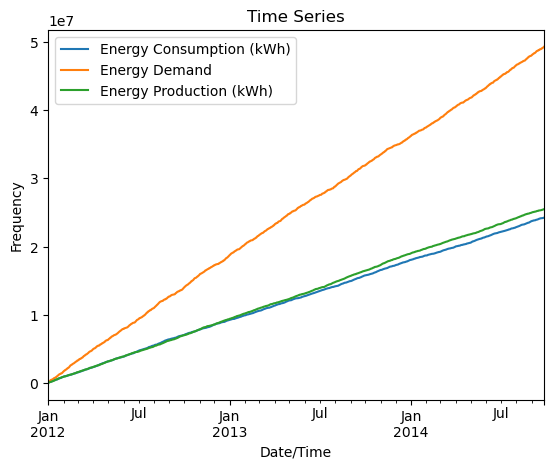

In [38]:
#Time Series plot
df[["Energy Consumption (kWh)","Energy Demand","Energy Production (kWh)"]].cumsum().plot()
plt.title("Time Series")
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency Count')

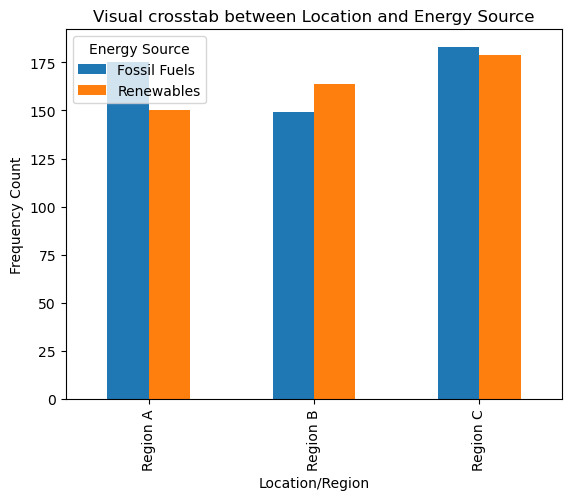

In [43]:
pd.crosstab(df['Location/Region'], df['Energy Source']).plot(kind="bar")
plt.title("Visual crosstab between Location and Energy Source")
plt.ylabel("Frequency Count")

In [47]:
df.stack()

Date/Time                           
2012-01-01  Date/Time                   2012-01-01 00:00:00
            Location/Region                        Region A
            Energy Source                      Fossil Fuels
            Energy Demand                             24016
            Energy Consumption (kWh)                  21848
                                               ...         
2014-09-26  Energy Demand                             97228
            Energy Consumption (kWh)                  10748
            Energy Price                           0.106347
            Operational Costs                   2872.336241
            Energy Production (kWh)                   24484
Length: 8000, dtype: object

<summary>From the analysis it can be said that there was consistent increase in price from 2012 to 2014 and also Region C made the highest impact on the growth level.</summary>